In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time


In [30]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/UMD_Research_Local_File_Saves/PSI_800k_run_no_b.nc")
v = ocean_data.v
b = ocean_data.b

In [31]:
ocean_data

<xarray.Dataset>
Dimensions:  (zC: 200, zF: 201, xC: 1, yF: 1024, xF: 1, yC: 1024, time: 64)
Coordinates:
  * zC       (zC) float64 -199.5 -198.5 -197.5 -196.5 ... -3.5 -2.5 -1.5 -0.5
  * zF       (zF) float64 -200.0 -199.0 -198.0 -197.0 ... -3.0 -2.0 -1.0 0.0
  * xC       (xC) float64 0.5
  * yF       (yF) float64 0.0 2.93 5.859 8.789 ... 2.991e+03 2.994e+03 2.997e+03
  * xF       (xF) float64 0.0
  * yC       (yC) float64 1.465 4.395 7.324 ... 2.993e+03 2.996e+03 2.999e+03
  * time     (time) timedelta64[ns] 00:00:00 00:16:40 ... 17:13:20 17:30:00
Data variables:
    v        (time, zC, yF, xC) float64 ...
    B        (time, zC, yC, xC) float64 ...
    U        (time, zC, yC, xF) float64 ...
    w        (time, zF, yC, xC) float64 ...
    b        (time, zC, yC, xC) float64 ...
    V        (time, zC, yF, xC) float64 ...
    u        (time, zC, yC, xF) float64 ...
Attributes:
    interval:              1000.0
    Oceananigans:          This file was generated using Oceananigans v0.87.0
    Julia:                 This file was generated using Julia Version 1.9.1\...
    output time interval:  Output was saved every 16.667 minutes.
    date:                  This file was generated on 2023-08-28T11:58:33.085.
    schedule:              TimeInterval

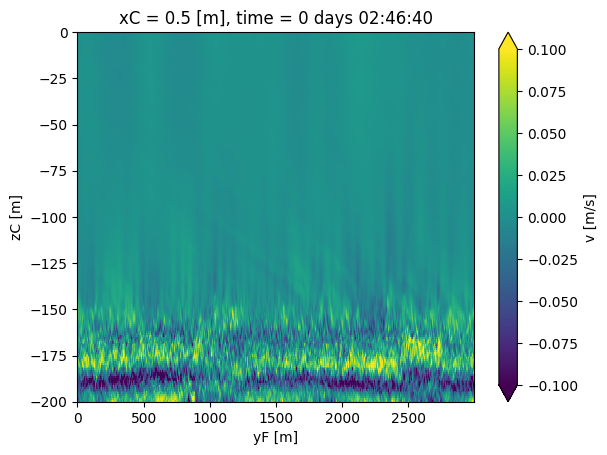

In [41]:
# vmin and vmax control colorbar range
# for i in range(len(ocean_data.time)):
i = 10
k = -1
v[i].plot(vmin=-1*10**(k),vmax=1*10**(k))
plt.show()


b[1].plot()

In [6]:
(5*2*np.pi)/((2*np.pi/(24*60*60))*np.sin(np.pi/180*45))

610940.2589451772

In [7]:
(2*np.pi/(24*60*60))*np.sin((np.pi/180)*90)

7.27220521664304e-05